# Create Plots and HTML file for the validation of upper limits

## Author(s): Sven Buder (SB, WG4)

### History:
200311 SB Created

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import os
import sys
import scipy
import pandas
from astropy.table import Table, hstack, vstack
from astropy.nddata import bitmask

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
def plot_density(x, y, bins=100, range=None, normed=False, weights=None, 
                 scaling=None, reduce_fn='median', smooth=0, ax=None, cmin=5, **kwargs):
    """
    Compute the bi-dimensional histogram of two data samples.

    Parameters
    ----------
    x : array_like, shape (N,)
        An array containing the x coordinates of the points to be
        histogrammed.
    y : array_like, shape (N,)
        An array containing the y coordinates of the points to be
        histogrammed.
    bins : int or array_like or [int, int] or [array, array], optional
        The bin specification:

        * If int, the number of bins for the two dimensions (nx=ny=bins).
        * If array_like, the bin edges for the two dimensions
            (x_edges=y_edges=bins).
        * If [int, int], the number of bins in each dimension
            (nx, ny = bins).
        * If [array, array], the bin edges in each dimension
            (x_edges, y_edges = bins).
        * A combination [int, array] or [array, int], where int
            is the number of bins and array is the bin edges.

    range : array_like, shape(2,2), optional
        The leftmost and rightmost edges of the bins along each dimension
        (if not specified explicitly in the `bins` parameters):
        ``[[xmin, xmax], [ymin, ymax]]``. All values outside of this range
        will be considered outliers and not tallied in the histogram.
    normed : bool, optional
        If False, returns the number of samples in each bin. If True,
        returns the bin density ``bin_count / sample_count / bin_area``.
    weights : array_like, shape(N,), optional
        An array of values ``w_i`` weighing each sample ``(x_i, y_i)``.
        Weights are normalized to 1 if `normed` is True. If `normed` is
        False, the values of the returned histogram are equal to the sum of
        the weights belonging to the samples falling into each bin.
    """
    import pylab as plt
    from scipy.ndimage import gaussian_filter

    ind = (np.isfinite(x) & np.isfinite(y))
    if False in ind:
        print("Warning: Not all values are finite.")
        w = weights
        if w is not None:
            w = w[ind]
        n, bx, by = plt.histogram2d(x[ind], y[ind], bins=bins, range=range, normed=normed,
                                    weights=w)
    else:
        n, bx, by = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                    weights=weights)

    if reduce_fn.lower() in ('average', 'mean', 'avg'):
        n0, _, _ = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                   weights=None)
        
        cmin_limit = (n0 < cmin)
        n[cmin_limit] = np.nan
        ind = n0 > 0
        n = n.astype(float)
        n[ind] /= n0[ind].astype(float)
    n[(n==0)] = np.nan
    
    defaults = dict(zorder = 2, cmap='RdYlBu_r', origin='lower', aspect='auto', rasterized=True,
                    interpolation='nearest')
    defaults.update(**kwargs)
    extent = (bx[0], bx[-1], by[0], by[-1])

    if smooth > 0:
        gaussian_filter(n, smooth, output=n)

    if ax==None:
        ax = plt.gca()
    else:
        ax=ax
        
    if scaling is None:
        scaling = 'None'
    s = scaling.lower().replace(' ', '')
    if s in (None, 'none', 'count'):
        return ax.imshow(n.T, extent=extent, **defaults)#, n
    else:
        if s in ('log', 'log(n)', 'log10', 'log(count)'):
            return ax.imshow(np.log10(n).T, extent=extent, **defaults)#, np.log10(n)
        elif s in ('log(n+1)', 'log(count+1)'):
            return ax.imshow(np.log10(n + 1).T, extent=extent, **defaults)#, np.log10(n + 1)

In [3]:
main_catalog_file = '../../catalogs/GALAH_DR3_main.fits'
main_catalog = Table.read(main_catalog_file)

In [4]:
def plot_limit_overview(element, selected_group, teff_bins=np.linspace(3000,8000,100), logg_bins=np.linspace(-0.5,5.25,100), feh_bins=np.linspace(-2.5,0.75,100)):
    
    selection = (
            (main_catalog['teff'] >= selected_group[0]) &
            (main_catalog['teff']  < selected_group[1]) &
            (main_catalog['logg'] >= selected_group[2]) &
            (main_catalog['logg']  < selected_group[3]) 
    )
    
    if element in ['Li']:
        element_bins = np.linspace(-2.0,5.,100)
        
    elif element in ['C']:
        element_bins = np.linspace(-1,2.5,100)
    else:
        element_bins = np.linspace(-2,2.5,100)
        print('Could not find in element_bins: ',element)
        
    fig, gs = plt.subplots(2,3,figsize=(15,10))
    
    selection_background = (main_catalog['flag_sp'] == 0)
    selection_flag0 = selection & (main_catalog['flag_'+element+'_fe'] == 0)
    selection_flag1 = selection & (main_catalog['flag_'+element+'_fe'] == 1)
    selection_flag2 = selection & np.isfinite(main_catalog[element+'_fe'])
    
    kwargs_hist2d_teff_logg = dict(cmin=1, cmap=parula, bins=(teff_bins,logg_bins),rasterized=True)
    kwargs_hist2d_teff_logg_background = dict(cmin=1, cmap='Greys', bins=(teff_bins,logg_bins),rasterized=True)
    
    kwargs_hist2d_feh_xfe = dict(cmin=1, cmap=parula, bins=(feh_bins,element_bins),rasterized=True)
    kwargs_hist2d_feh_xfe_background = dict(cmin=1, cmap='Greys', bins=(feh_bins,element_bins),rasterized=True)

    # plot regions of Teff-logg
    
    ax = gs[0,0]
    ax.set_title('All :'+str(len(main_catalog['teff'][selection_flag2])))
    ax.hist2d(
        main_catalog['teff'][selection_background],
        main_catalog['logg'][selection_background],
        zorder=1,norm=LogNorm(),
        **kwargs_hist2d_teff_logg_background
    )
    p,x,y,s=ax.hist2d(
        main_catalog['teff'][selection_flag2],
        main_catalog['logg'][selection_flag2],
        zorder=2,norm=LogNorm(),
        **kwargs_hist2d_teff_logg
    )
    ax.set_xlabel(r'$T_\text{eff}$')
    ax.set_ylabel(r'$\log g$')
    ax.set_xlim(teff_bins[-1],teff_bins[0])
    ax.set_ylim(logg_bins[-1],logg_bins[0])
#     c=plt.colorbar(s,ax=ax)
#     c.set_label('Nr. Spectra')

    rect = patches.Rectangle((selected_group[0],selected_group[2]),selected_group[1]-selected_group[0],selected_group[3]-selected_group[2],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

    ax = gs[0,1]
    ax.set_title(r'flag\_x\_fe 0 :'+str(len(main_catalog['teff'][selection_flag0])))
    ax.hist2d(
        main_catalog['teff'][selection_background],
        main_catalog['logg'][selection_background],
        zorder=1,norm=LogNorm(),
        **kwargs_hist2d_teff_logg_background
    )
    p,x,y,s=ax.hist2d(
        main_catalog['teff'][selection_flag0],
        main_catalog['logg'][selection_flag0],
        zorder=2,norm=LogNorm(),
        **kwargs_hist2d_teff_logg
    )
    ax.set_xlabel(r'$T_\text{eff}$')
    ax.set_ylabel(r'$\log g$')
    ax.set_xlim(teff_bins[-1],teff_bins[0])
    ax.set_ylim(logg_bins[-1],logg_bins[0])
#     c=plt.colorbar(s,ax=ax)
#     c.set_label('Nr. Spectra')
    
    rect = patches.Rectangle((selected_group[0],selected_group[2]),selected_group[1]-selected_group[0],selected_group[3]-selected_group[2],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

    ax = gs[0,2]
    ax.set_title(r'flag\_x\_fe 1 :'+str(len(main_catalog['teff'][selection_flag1])))
    ax.hist2d(
        main_catalog['teff'][selection_background],
        main_catalog['logg'][selection_background],
        zorder=1,norm=LogNorm(),
        **kwargs_hist2d_teff_logg_background
    )
    p,x,y,s=ax.hist2d(
        main_catalog['teff'][selection_flag1],
        main_catalog['logg'][selection_flag1],
        zorder=2,norm=LogNorm(),
        **kwargs_hist2d_teff_logg
    )
    ax.set_xlabel(r'$T_\text{eff}$')
    ax.set_ylabel(r'$\log g$')
    ax.set_xlim(teff_bins[-1],teff_bins[0])
    ax.set_ylim(logg_bins[-1],logg_bins[0])
#     c=plt.colorbar(s,ax=ax)
#     c.set_label('Nr. Spectra')

    rect = patches.Rectangle((selected_group[0],selected_group[2]),selected_group[1]-selected_group[0],selected_group[3]-selected_group[2],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

    ax = gs[1,0]
    ax.set_title('All :'+str(len(main_catalog['fe_h'][selection_flag2])))
    ax.hist2d(
        main_catalog['fe_h'][selection_background],
        main_catalog[element+'_fe'][selection_background],
        zorder=1,norm=LogNorm(),
        **kwargs_hist2d_feh_xfe_background
    )
    p,x,y,s=ax.hist2d(
        main_catalog['fe_h'][selection_flag2],
        main_catalog[element+'_fe'][selection_flag2],
        zorder=2,norm=LogNorm(),
        **kwargs_hist2d_feh_xfe
    )
    ax.set_xlabel(r'[Fe/H]')
    ax.set_ylabel(r'['+element+'/Fe]')
    ax.set_xlim(feh_bins[0],feh_bins[-1])
    ax.set_ylim(element_bins[0],element_bins[-1])
#     c=plt.colorbar(s,ax=ax)
#     c.set_label('Nr. Spectra')
    if element in ['Si']:
        ax.plot(np.linspace(-3,1),-0.9*np.linspace(-3,1)-0.5,c='r')
    elif element not in ['Li']:
        ax.plot(np.linspace(-3,1),-np.linspace(-3,1)-0.5,c='r')

    ax = gs[1,1]
    ax.set_title('Detections :'+str(len(main_catalog['fe_h'][selection_flag0])))
    ax.hist2d(
        main_catalog['fe_h'][selection_background],
        main_catalog[element+'_fe'][selection_background],
        zorder=1,norm=LogNorm(),
        **kwargs_hist2d_feh_xfe_background
    )
    p,x,y,s=ax.hist2d(
        main_catalog['fe_h'][selection_flag0],
        main_catalog[element+'_fe'][selection_flag0],
        zorder=2,norm=LogNorm(),
        **kwargs_hist2d_feh_xfe
    )
    ax.set_xlabel(r'[Fe/H]')
    ax.set_ylabel(r'['+element+'/Fe]')
    ax.set_xlim(feh_bins[0],feh_bins[-1])
    ax.set_ylim(element_bins[0],element_bins[-1])
#     c=plt.colorbar(s,ax=ax)
#     c.set_label('Nr. Spectra')
    if element in ['Si']:
        ax.plot(np.linspace(-3,1),-0.9*np.linspace(-3,1)-0.5,c='r')
    elif element not in ['Li']:
        ax.plot(np.linspace(-3,1),-np.linspace(-3,1)-0.5,c='r')

    ax = gs[1,2]
    ax.set_title('Upper limits :'+str(len(main_catalog['fe_h'][selection_flag1])))
    ax.hist2d(
        main_catalog['fe_h'][selection_background],
        main_catalog[element+'_fe'][selection_background],
        zorder=1,norm=LogNorm(),
        **kwargs_hist2d_feh_xfe_background
    )
    p,x,y,s=ax.hist2d(
        main_catalog['fe_h'][selection_flag1],
        main_catalog[element+'_fe'][selection_flag1],
        zorder=2,norm=LogNorm(),
        **kwargs_hist2d_feh_xfe
    )
    ax.set_xlabel(r'[Fe/H]')
    ax.set_ylabel(r'['+element+'/Fe]')
    ax.set_xlim(feh_bins[0],feh_bins[-1])
    ax.set_ylim(element_bins[0],element_bins[-1])
#     c=plt.colorbar(s,ax=ax)
#     c.set_label('Nr. Spectra')
    if element in ['Si']:
        ax.plot(np.linspace(-3,1),-0.9*np.linspace(-3,1)-0.5,c='r')
    elif element not in ['Li']:
        ax.plot(np.linspace(-3,1),-np.linspace(-3,1)-0.5,c='r')
    
    
    plt.tight_layout()
    
    return fig

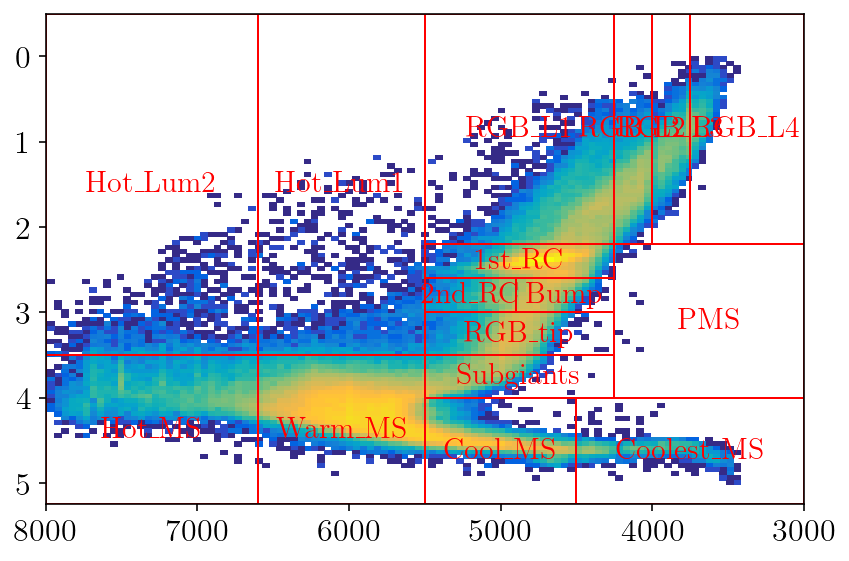

In [5]:
subgroups = dict()
subgroups['Coolest_MS'] = np.array([3000,4500, 4.00,5.25])
subgroups['Cool_MS']    = np.array([4500,5500, 4.00,5.25])
subgroups['Warm_MS']    = np.array([5500,6600, 3.50,5.25])
subgroups['Hot_MS']     = np.array([6600,8000, 3.50,5.25])
subgroups['Hot_Lum1']   = np.array([5500,6600,-0.50,3.50])
subgroups['Hot_Lum2']   = np.array([6600,8000,-0.50,3.50])
subgroups['Subgiants']  = np.array([4250,5500, 3.50,4.00])
subgroups['RGB_tip']    = np.array([4250,5500, 3.00,3.50])
subgroups['1st_RC']     = np.array([4250,5500, 2.20,2.60])
subgroups['RGB_L1']     = np.array([4250,5500, -0.5,2.20])
subgroups['RGB_L2']     = np.array([4000,4250, -0.5,2.20])
subgroups['RGB_L3']     = np.array([3750,4000, -0.5,2.20])
subgroups['RGB_L4']     = np.array([3000,3750, -0.5,2.20])
subgroups['Bump']       = np.array([4250,4900, 2.60,3.00])
subgroups['2nd_RC']     = np.array([4900,5500, 2.60,3.00])
subgroups['PMS']       = np.array([3000,4250, 2.20,4.00])

def plot_subgroup_overview():
    f, ax = plt.subplots()

    ax.hist2d(
        main_catalog['teff'][(main_catalog['flag_sp']==0)],
        main_catalog['logg'][(main_catalog['flag_sp']==0)],
        bins=100,cmin=1,cmap=parula,norm=LogNorm()
        )

    for subgroup in subgroups.keys():
        selected_group=subgroups[subgroup]
        rect = patches.Rectangle((selected_group[0],selected_group[2]),selected_group[1]-selected_group[0],selected_group[3]-selected_group[2],linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        ax.text(0.5*(selected_group[0]+selected_group[1]),0.5*(selected_group[2]+selected_group[3]),subgroup.replace('_','\_'),ha='center',va='center',c='r',fontsize=15)

    ax.set_xlim(8000,3000)
    ax.set_ylim(5.25,-0.5)

    plt.tight_layout()
    
    return(f)

f = plot_subgroup_overview()
f.savefig('dr3_upper_limit_group_overview.png',dpi=200,bbox_inches='tight')

In [6]:
def create_upper_limit_overview(element):

    html_text = [
        ['<HTML><BODY>'],
        ['<TABLE BORDER=2>']
    ]
    
    html_text.append(['<TR><TD> Overview of subgroups: <br> '])
    html_text.append(['<a href=../dr3_upper_limit_group_overview.png><IMG src=../dr3_upper_limit_group_overview.png width=1024></a>'])

    if not glob.glob('dr3_upper_limit_overview_'+element):
        os.system('mkdir dr3_upper_limit_overview_'+element)

    for selected in subgroups.keys():

        fig = plot_limit_overview(element, selected_group=subgroups[selected])
        
        fig.savefig('dr3_upper_limit_overview_'+element+'/dr3_upper_limits_'+element+'_'+selected+'.png',dpi=200,bbox_inches='tight')
        
        plt.close()
        
        if selected == 'Coolest_MS':
            name='Coolest Main Sequence Stars'
        elif selected == 'Cool_MS':
            name='Cool Main Sequence Stars'
        elif selected == 'Warm_MS':
            name='Warm Main Sequence Stars'
        elif selected == 'Hot_MS':
            name='Hot Main Sequence Stars'
        elif selected == 'Hot_Lum2':
            name='Hottest Luminous Stars'
        elif selected == 'Hot_Lum1':
            name='Hot Luminous Stars'
        elif selected == 'Subgiants':
            name='Subgiants'
        elif selected == 'RGB_tip':
            name='RGB Tip Stars'
        elif selected == '1st_RC':
            name='Primary RC Stars'
        elif selected == 'RGB_L1':
            name='Hottest Luminous RGB Stars'
        elif selected == 'RGB_L2':
            name='Hot Luminous RGB Stars'
        elif selected == 'RGB_L3':
            name='Cool Luminous RGB Stars'
        elif selected == 'RGB_L4':
            name='Coolest Luminous RGB Stars'
        elif selected == 'Bump':
            name='RGB Bump Stars'
        elif selected == '2nd_RC':
            name='Secondary RC Stars'
        elif selected == 'PMS':
            name='Pre Main Sequence'
        else:
            print('Not yet included!',selected)

        html_text.append(['<TR><TD> '+name+': '+str(subgroups[selected][0])+' < Teff <= '+str(subgroups[selected][1])+', '+str(subgroups[selected][2])+' < logg <= '+str(subgroups[selected][3])+' <br>'])
        html_text.append(['<a href=dr3_upper_limit_overview_'+element+'/dr3_upper_limits_'+element+'_'+selected+'.png><IMG src=dr3_upper_limits_'+element+'_'+selected+'.png width=1024></a>'])
        
    html_text.append(['</TABLE></BODY></HTML>'])
    np.savetxt('dr3_upper_limit_overview_'+element+'/dr3_upper_limits_'+element+'.html',html_text,fmt='%s')

In [7]:
for element in ['Li','C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Ti2','V','Cr','Mn','Co','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']:
    create_upper_limit_overview(element)

Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
Could not find in element_bins:  Co
